In [1]:
! python -m  pip install tensorflow jupyterlab-vim autocompletion

In [2]:
! python -m pip install opencv-python 

In [3]:
! python3 -m pip install tensorflow[and-cuda]

In [4]:
! python -m pip install keras

In [33]:
import tensorflow as tf
import keras
import numpy as np
import os
import imghdr
import cv2
import matplotlib.pyplot as plt

In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)
gpus

[]

In [35]:
image_exts = ['jpeg', 'jpg','bmp','png']
data_dir = '/Windows/Drive_2/work_2/image-classif-with-cnn/data'

In [36]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            with open(image_path,'r') as file:
                img = cv2.imread(image_path)
                ext = imghdr.what(image_path)      
            if ext not in image_exts:
                # print('Image not in .ext list {}'.format(image_path))
                os.remove(image_path)
        except OSError as e:
             # print('Issue with image {}'.format(image_path))
            pass

In [37]:
keras.utils.image_dataset_from_directory(data_dir,batch_size=8, image_size=(128,128))

Found 246 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [78]:
# loading the dataset

# this utility takes all the images from the specified directories
# does all the pre processing out of the box , and makes lives easy ig
data = keras.utils.image_dataset_from_directory(data_dir)

# converting to numpy iterator to access using our data pipelines
data_iterator = data.as_numpy_iterator()
batch =data_iterator.next()

Found 246 files belonging to 2 classes.


In [39]:
batch[0].shape

(32, 256, 256, 3)

In [40]:
batch[1]
# giving the list labels applied to the images 
# in this case 
# 0 = happy
# 1 => sad

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

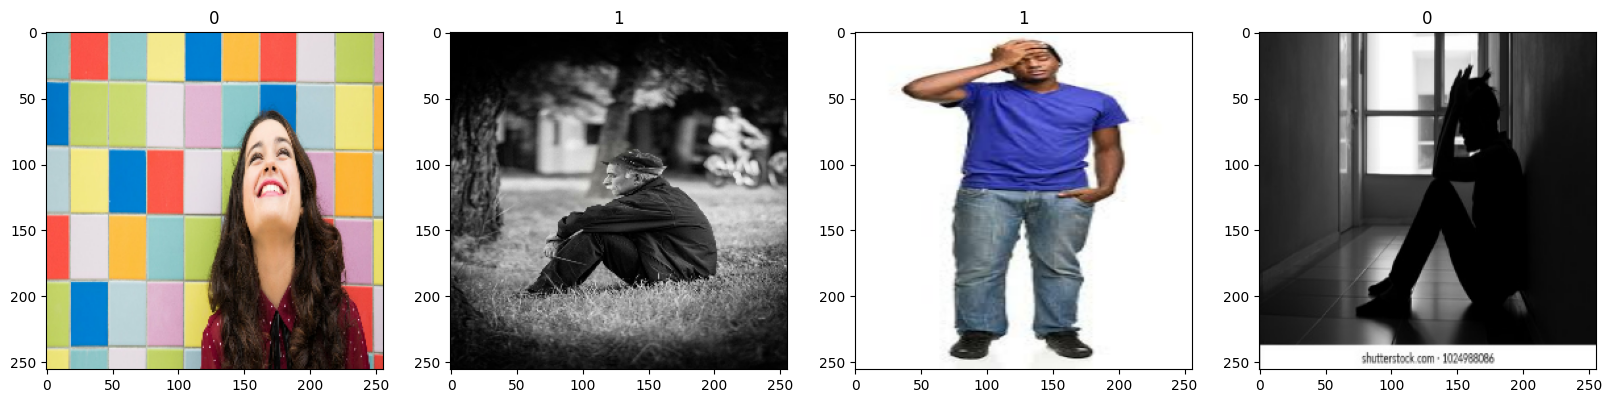

In [13]:
# plotting for batch 
fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][6:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
# preprocessing the data

In [15]:
# Note:
# batch[0] => has the images
# batch[1] => has the labels

# as the images are in RGB format

batch[0].max() # should give 255
batch[0].min() # should give 0 

0.0

In [41]:
# scaling them to 0 to 1 ( by dividing with 255 )

scaled = batch[0] / 255 
scaled.max() # o/p should be 1.0

1.0

In [17]:
# Note :
# we are trying implement all these with the help of pipeline , 
# So scaling things down like this won't be optimal
# We have to do it while loading the data itself

In [42]:
# so achieving that,
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#transformations
data2 = data.map(lambda x, y: (x/255.0,y))


#converting to a numpy iterator

scaled_iterator = data2.as_numpy_iterator()
batch_scaled =scaled_iterator.next()

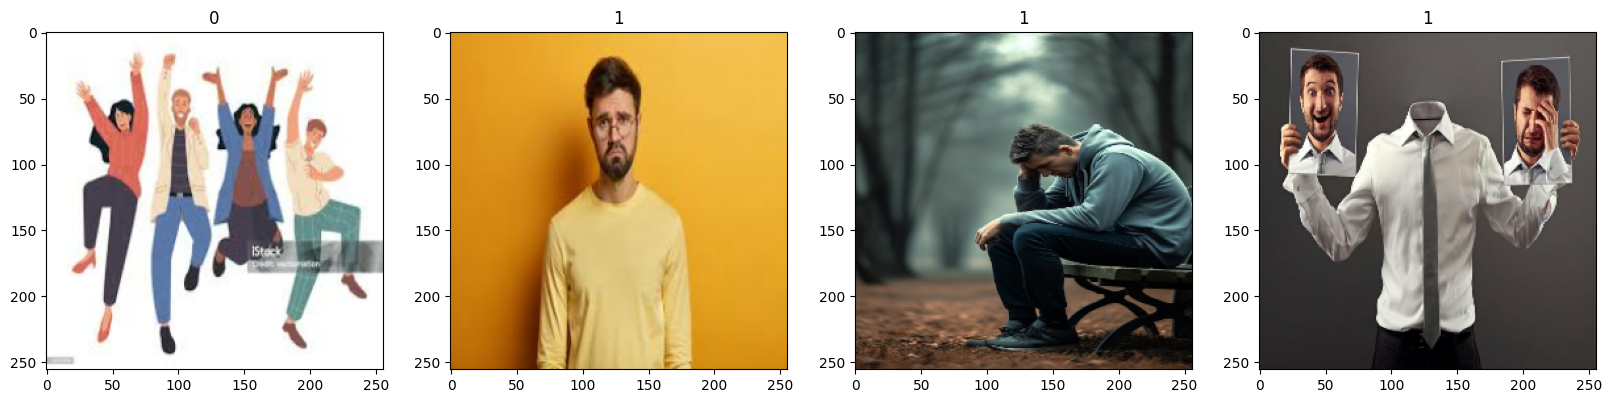

In [19]:
# plotting the scaled data

fig , ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch_scaled[0][0:4]):
    
    # note the difference here
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_scaled[1][idx])

In [20]:
# Splitting data
len(data2)

8

In [43]:
#manually splitting the dataset 

train_size = int(len(data)*.7 )
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [44]:
train_size+val_size+test_size # should be same as len(data2)

8

In [45]:
data2 # to skip the first n items from a dataset and select the rest

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
# we are allocating the batches here
# our data is already shuffled so we directly doing this step

train = data2.take(train_size)
val = data2.skip(train_size).take(val_size)
test = data2.skip(train_size+val_size).take(test_size)

In [25]:

# creating the model 


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [27]:
model  = Sequential??

Init signature: Sequential(layers=None, trainable=True, name=None)
Source:        
@keras_export(["keras.Sequential", "keras.models.Sequential"])
class Sequential(Model):
    """`Sequential` groups a linear stack of layers into a `Model`.

    Examples:

    ```python
    model = keras.Sequential()
    model.add(keras.Input(shape=(16,)))
    model.add(keras.layers.Dense(8))

    # Note that you can also omit the initial `Input`.
    # In that case the model doesn't have any weights until the first call
    # to a training/evaluation method (since it isn't yet built):
    model = keras.Sequential()
    model.add(keras.layers.Dense(8))
    model.add(keras.layers.Dense(4))
    # model.weights not created yet

    # Whereas if you specify an `Input`, the model gets built
    # continuously as you are adding layers:
    model = keras.Sequential()
    model.add(keras.Input(shape=(16,)))
    model.add(keras.layers.Dense(8))
    len(model.weights)  # Returns "2"

    # When using the delayed-b

In [49]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu')) # 256 is the no. of neurons
model.add(Dense(1,activation='sigmoid'))

In [51]:
# 'relu' is added to make the values linear , as we are
# only dealing with linear values here

# maxpooling2D condenes the info 
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train,epochs=20,validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4418 - loss: 1.2105 - val_accuracy: 0.6094 - val_loss: 0.6114
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - accuracy: 0.5526 - loss: 0.6475 - val_accuracy: 0.7812 - val_loss: 0.6081
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - accuracy: 0.7032 - loss: 0.6276 - val_accuracy: 0.8438 - val_loss: 0.5783
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - accuracy: 0.8075 - loss: 0.5727 - val_accuracy: 0.6719 - val_loss: 0.5217
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - accuracy: 0.7840 - loss: 0.5056 - val_accuracy: 0.8906 - val_loss: 0.4111
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 513ms/step - accuracy: 0.8606 - loss: 0.4214 - val_accuracy: 0.8594 - val_loss: 0.3305
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - accuracy: 0.8979 - loss: 0.2756 - val_accuracy: 0.8906 - val_loss: 0.2839
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.8993 - loss: 0.2735 - val_accuracy: 0.8281 - val_loss: 0.

In [57]:
hist.history

{'accuracy': [0.5,
  0.5562499761581421,
  0.6812499761581421,
  0.768750011920929,
  0.831250011920929,
  0.8500000238418579,
  0.8812500238418579,
  0.875,
  0.893750011920929,
  0.956250011920929,
  0.9624999761581421,
  0.987500011920929,
  0.9750000238418579,
  0.9937499761581421,
  0.9937499761581421,
  0.9937499761581421,
  0.981249988079071,
  1.0,
  1.0,
  1.0],
 'loss': [1.1581103801727295,
  0.6555685997009277,
  0.6276847124099731,
  0.561564564704895,
  0.47808918356895447,
  0.4177674651145935,
  0.296203076839447,
  0.3105902671813965,
  0.27242162823677063,
  0.20938973128795624,
  0.13433440029621124,
  0.09726513922214508,
  0.08664846420288086,
  0.05774499103426933,
  0.05656777694821358,
  0.029360655695199966,
  0.042359836399555206,
  0.018802497535943985,
  0.02082504704594612,
  0.010730733163654804],
 'val_accuracy': [0.609375,
  0.78125,
  0.84375,
  0.671875,
  0.890625,
  0.859375,
  0.890625,
  0.828125,
  0.921875,
  0.90625,
  0.984375,
  0.953125,
  0.9

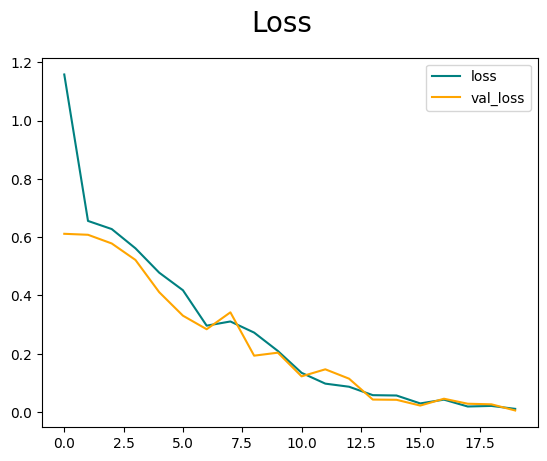

In [62]:
# plotting the performance

fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [ ]:
# note:
# if the loss is decreasing , but the val_loss => increasing
# which means the model is overfitting

# it can be a straight line as well , if you know what i mean
# that means problem with the data which has been used or the way it's used


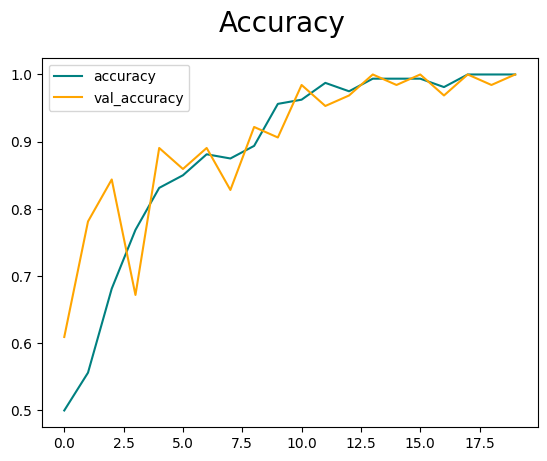

In [66]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# testing our model (evaluation)

In [74]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [80]:
precision= Precision()
recall = Recall()
binAcc = BinaryAccuracy()

In [67]:
len(test)

1

In [81]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat) 
    recall.update_state(y,yhat)
    binAcc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


2024-04-05 20:39:55.205089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
